In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv('dataset/e_commerce_data.csv')

Summary Statistics

In [7]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.354164,0.915389,8.339095,0.705384,1.023999,1.380194,2.583586,0.451408,3.587926,1.851038,2.871521,3.553382,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,4.000000,163.000000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.008004,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


Visualizing Correlation Matrix

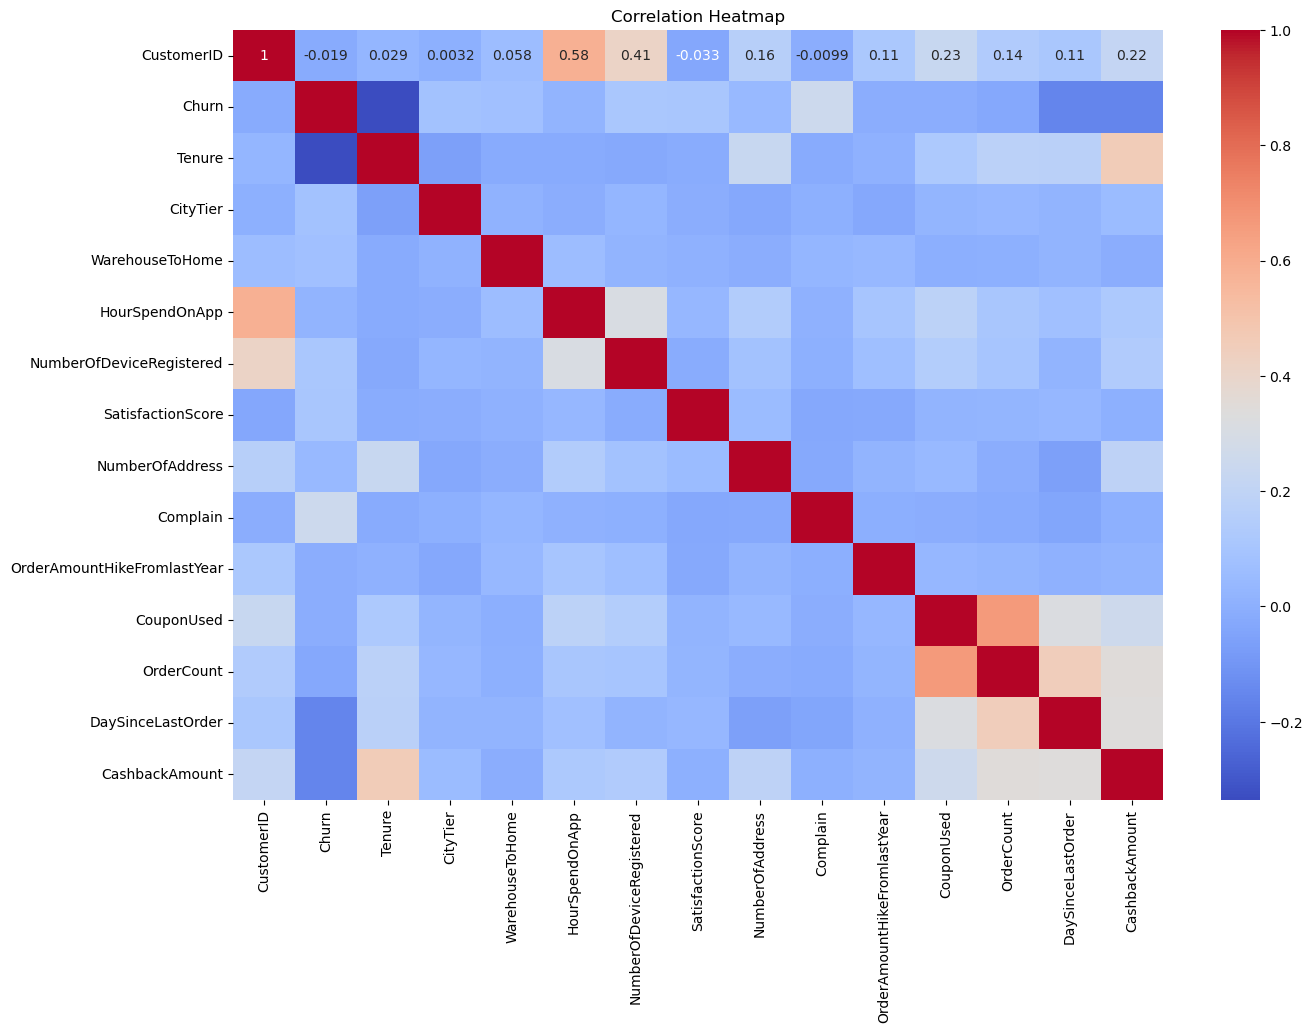

In [19]:
numeric_cols = data.select_dtypes(include= ['float64', 'int64']).columns
numeric_data = data[numeric_cols]
correlation_matrix = numeric_data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Above heatmap shows a lot about correlation of features: The most notable is the following: 
'Tenure, DaysSinceLast Order, and CashbackAmount have stronger negative correlation to Churn. Complain, CityTier, WarehouseToHome has the least correlation'. 

This and other observations can help us understand the most influencial KPIs we will choose. Before that though, performing further visualizations after performing PCA can help confirm correlations. 


PCA

In [26]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   HourSpendOnApp               5630 non-null   float64
 6   NumberOfDeviceRegistered     5630 non-null   int64  
 7   SatisfactionScore            5630 non-null   int64  
 8   NumberOfAddress              5630 non-null   int64  
 9   Complain                     5630 non-null   int64  
 10  OrderAmountHikeFromlastYear  5630 non-null   float64
 11  CouponUsed                   5630 non-null   float64
 12  OrderCount                   5630 non-null   float64
 13  DaySinceLastOrder 

In [37]:
#scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

#PCA
pca = PCA()
pca.fit(scaled_data)

#explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

#data to PCA
pca_data = pca.transform(scaled_data)

#Principal components
components_df = pd.DataFrame(pca.components_, columns = numeric_data.columns)
components_df

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.346232,-0.115440,0.260435,0.014295,0.017719,0.288963,0.234245,0.007259,0.142668,-0.038090,0.070298,0.416250,0.425730,0.343479,0.400991
1,0.427367,0.362154,-0.352524,0.041364,0.121432,0.445502,0.406855,0.025562,0.095917,0.140092,0.138518,-0.053347,-0.173866,-0.250353,-0.192488
2,-0.181820,0.403510,-0.386167,0.203129,0.072446,-0.148066,-0.060360,0.101395,-0.390920,0.233450,-0.096868,0.356706,0.391153,0.230125,-0.150798
3,-0.141023,0.404544,0.272885,0.105025,0.039162,-0.129208,-0.051500,0.310399,0.506211,0.470293,-0.224655,-0.045853,-0.028335,-0.123225,0.260283
4,0.003421,-0.010447,0.153622,0.086408,0.219320,-0.084201,0.002757,-0.730085,-0.141439,0.526020,0.244630,-0.071032,-0.035849,-0.011253,0.132615
5,-0.062914,0.035057,0.045692,-0.666948,0.456905,0.009433,-0.184560,0.279021,-0.004378,0.126363,0.438376,0.043661,0.054037,0.072822,-0.094072
6,-0.000281,-0.059331,0.043967,0.535946,0.747670,-0.002495,-0.064497,0.146999,-0.020912,-0.275710,0.026787,-0.148984,-0.087763,0.082399,0.093081
7,0.112850,-0.093307,-0.004979,-0.369741,0.338850,0.120682,0.050954,-0.150510,-0.118557,0.080591,-0.812828,-0.019515,-0.031923,0.055690,-0.038084
8,-0.131963,0.206277,-0.091688,-0.092109,0.175980,-0.182438,-0.024904,-0.426207,0.503848,-0.406110,-0.016169,0.324115,0.223073,-0.266887,-0.177564
9,0.168873,-0.149372,-0.106471,0.167129,-0.063050,0.434766,-0.757975,-0.055821,0.219511,0.169888,-0.038732,0.110928,0.011525,0.046514,-0.214742


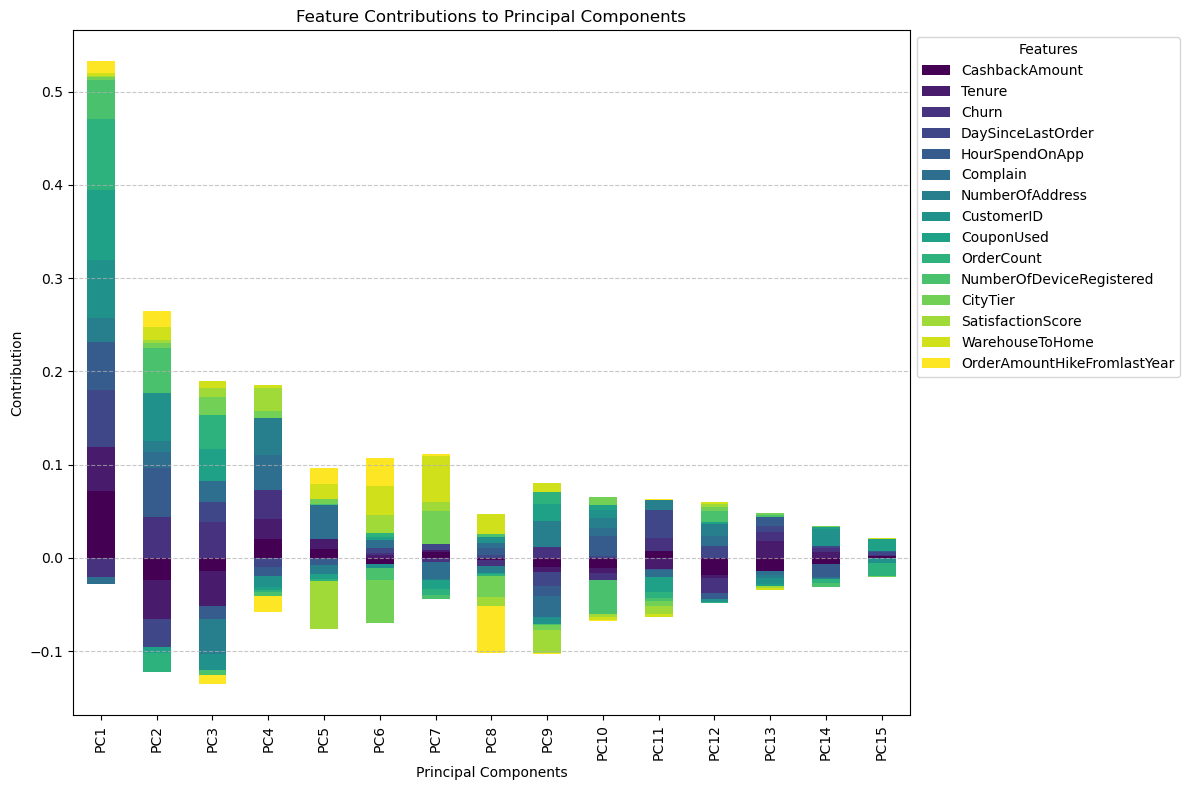

In [50]:
# Get the absolute contributions of each feature to each principal component
feature_contributions = pd.DataFrame(pca.components_.T * pca.explained_variance_ratio_,
                                     columns=['PC{}'.format(i+1) for i in range(len(pca.components_))],
                                    index=numeric_data.columns)

feature_contributions['Total_Contribution'] = feature_contributions.abs().sum(axis=1)
feature_contributions = feature_contributions.sort_values(by='Total_Contribution', ascending=False).drop(columns='Total_Contribution')
plt.figure(figsize=(12, 8))
feature_contributions.T.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.xlabel('Principal Components')
plt.ylabel('Contribution')
plt.title('Feature Contributions to Principal Components')
plt.legend(title='Features', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above stacked-bar chart shows that even though the heatmap might have visually showed some features to have less correlation with Churn, they still have a considerable impact to it (as seen by presence of corresponding colour in all features). Therefore, it would be unwise to drop them as they have an impact on later predictions. Dropping them might affect model performance. 

Tableau: These KPIs are mostly relatable to the use case. For better communication of data relationship, we will explore them further in Tableau and create a Dashboard. 


Conversion Rate: (Number of conversions / Number of visitors) * 100. the rate of visitors to be converted to customers

Retention Rate: (1 - Churn rate/ Total number of customers) * 100 (the rate of customers who  continue to make purchase overtime) 

Customer Purchase Avg vs. Avg. Average Order Value: on average, can customers afford items? 

- Average Order Value = Total Revenue/ Number of Orders (amount ecustomers sepend on each transaction. Changing AOV reflect change in pattersn that impact revenues and profitability)

Customer Lifetime Value: Break cusotmers in groups and calculate their values over time. how much value a customer brings throughout their relationship w/t business. Can help prioritize high-value customers or guite retention efforts

Cart Abandonment Rate: rate of those who abandon purchases online before checking out: 

Churn Rate: (Total number of customers lost/ Total number of customers) * 100  (give idea of retention and effectiveness of retention strategies)

Customer Satisfaction Score: in custome experience perspective, shows reasons for churn and areas of improvement

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   